In [1]:
import cobra
import cofactors
import matplotlib.pyplot as pp
import seaborn as sb
from pathlib import Path
from glob import glob
from plotting import *

In [2]:
sb.set(context='paper', style='whitegrid')

In [3]:
mappings = cofactors.create_mappings_ec_mitocore_from_xml(
    "../external_data/mitocore/mitocore_v1.01.xml"
)
kms_sabio = cofactors.read_sabiork(glob("../generated_data/sabiork_queries/*"))
kms_brenda = cofactors.read_brenda(glob("../generated_data/brenda_queries/*"))
subsystems = cofactors.read_subsystems("../external_data/mitocore/subsystems.csv")

# Brenda and SabioRK list concentrations as mM
c_old = {"Cytosol": 0.11, "Mitochondrion": 0.23}
c_mito = {"Cytosol": 0.066, "Mitochondrion": 0.023}

No mapping found for AMCOXO
No mapping found for AMCOXO2_MitoCore
ECs found for 102 reactions.
No ECs found for 0 reactions.


In [4]:
folder = Path('../generated_models')
mitoparp = cobra.io.read_sbml_model(folder / 'gimme_mito.xml')
c293 = cobra.io.read_sbml_model(folder / 'gimme_control.xml')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27


In [5]:
figpath = Path('../images/supplements/')

In [6]:
fva_frac = .8
mito_low_nad_min = cofactors.create_models_fva(mitoparp, mappings, kms_brenda, c_old, c_mito, obj_frac=fva_frac, decision=min)
c293_low_nad_min = cofactors.create_models_fva(c293, mappings, kms_brenda, c_old, c_mito, obj_frac=fva_frac, decision=min)

Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmp8hdf6wsn.lp
Reading time = 0.02 seconds
: 367 rows, 916 columns, 3752 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpvi3adan4.lp
Reading time = 0.03 seconds
: 358 rows, 896 columns, 3664 nonzeros


In [7]:
from statistics import mean, median
mito_low_nad_med = cofactors.create_models_fva(mitoparp, mappings, kms_brenda, c_old, c_mito, obj_frac=fva_frac, decision=median)
c293_low_nad_med = cofactors.create_models_fva(c293, mappings, kms_brenda, c_old, c_mito, obj_frac=fva_frac, decision=median)
mito_low_nad_mean = cofactors.create_models_fva(mitoparp, mappings, kms_brenda, c_old, c_mito, obj_frac=fva_frac, decision=mean)
c293_low_nad_mean = cofactors.create_models_fva(c293, mappings, kms_brenda, c_old, c_mito, obj_frac=fva_frac, decision=mean)

Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpt9mjtr86.lp
Reading time = 0.04 seconds
: 367 rows, 916 columns, 3752 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpopj9ippc.lp
Reading time = 0.02 seconds
: 358 rows, 896 columns, 3664 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpvpo3famf.lp
Reading time = 0.02 seconds
: 367 rows, 916 columns, 3752 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpi_mxsn2f.lp
Reading time = 0.02 seconds
: 358 rows, 896 columns, 3664 nonzeros


In [8]:
sol_m_min = mito_low_nad_min.optimize()
sol_m_med = mito_low_nad_med.optimize()
sol_m_mean = mito_low_nad_mean.optimize()

sol_c_min = c293_low_nad_min.optimize()
sol_c_med = c293_low_nad_med.optimize()
sol_c_mean = c293_low_nad_mean.optimize()

In [9]:
sol_m_min_atp = sol_m_min.objective_value
sol_m_med_atp = sol_m_med.objective_value
sol_m_mean_atp = sol_m_mean.objective_value

sol_c_min_atp = sol_c_min.objective_value
sol_c_med_atp = sol_c_med.objective_value
sol_c_mean_atp = sol_c_mean.objective_value

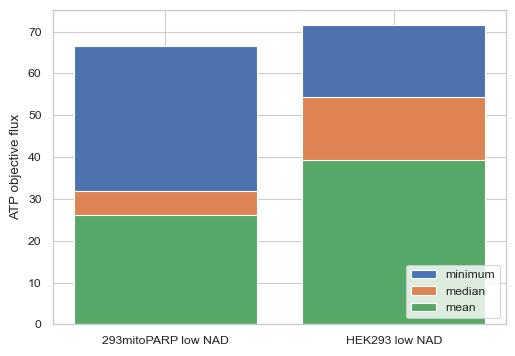

In [10]:
x = ['293mitoPARP low NAD', 'HEK293 low NAD']
pp.rcParams.update({'font.size': 48})
pp.bar(x, [sol_m_min_atp, sol_c_min_atp], label='minimum')
pp.bar(x, [sol_m_med_atp, sol_c_med_atp], label='median')
pp.bar(x, [sol_m_mean_atp, sol_c_mean_atp], label='mean')
pp.legend(loc='lower right')
pp.ylabel('ATP objective flux')

ax = pp.gca()
fig = ax.get_figure()
pp.tight_layout()
fig.savefig(figpath / 'figure_s4.svg')